In [1]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [0]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [0]:
# Importing the dataset
df = pd.read_csv('bank.csv')

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

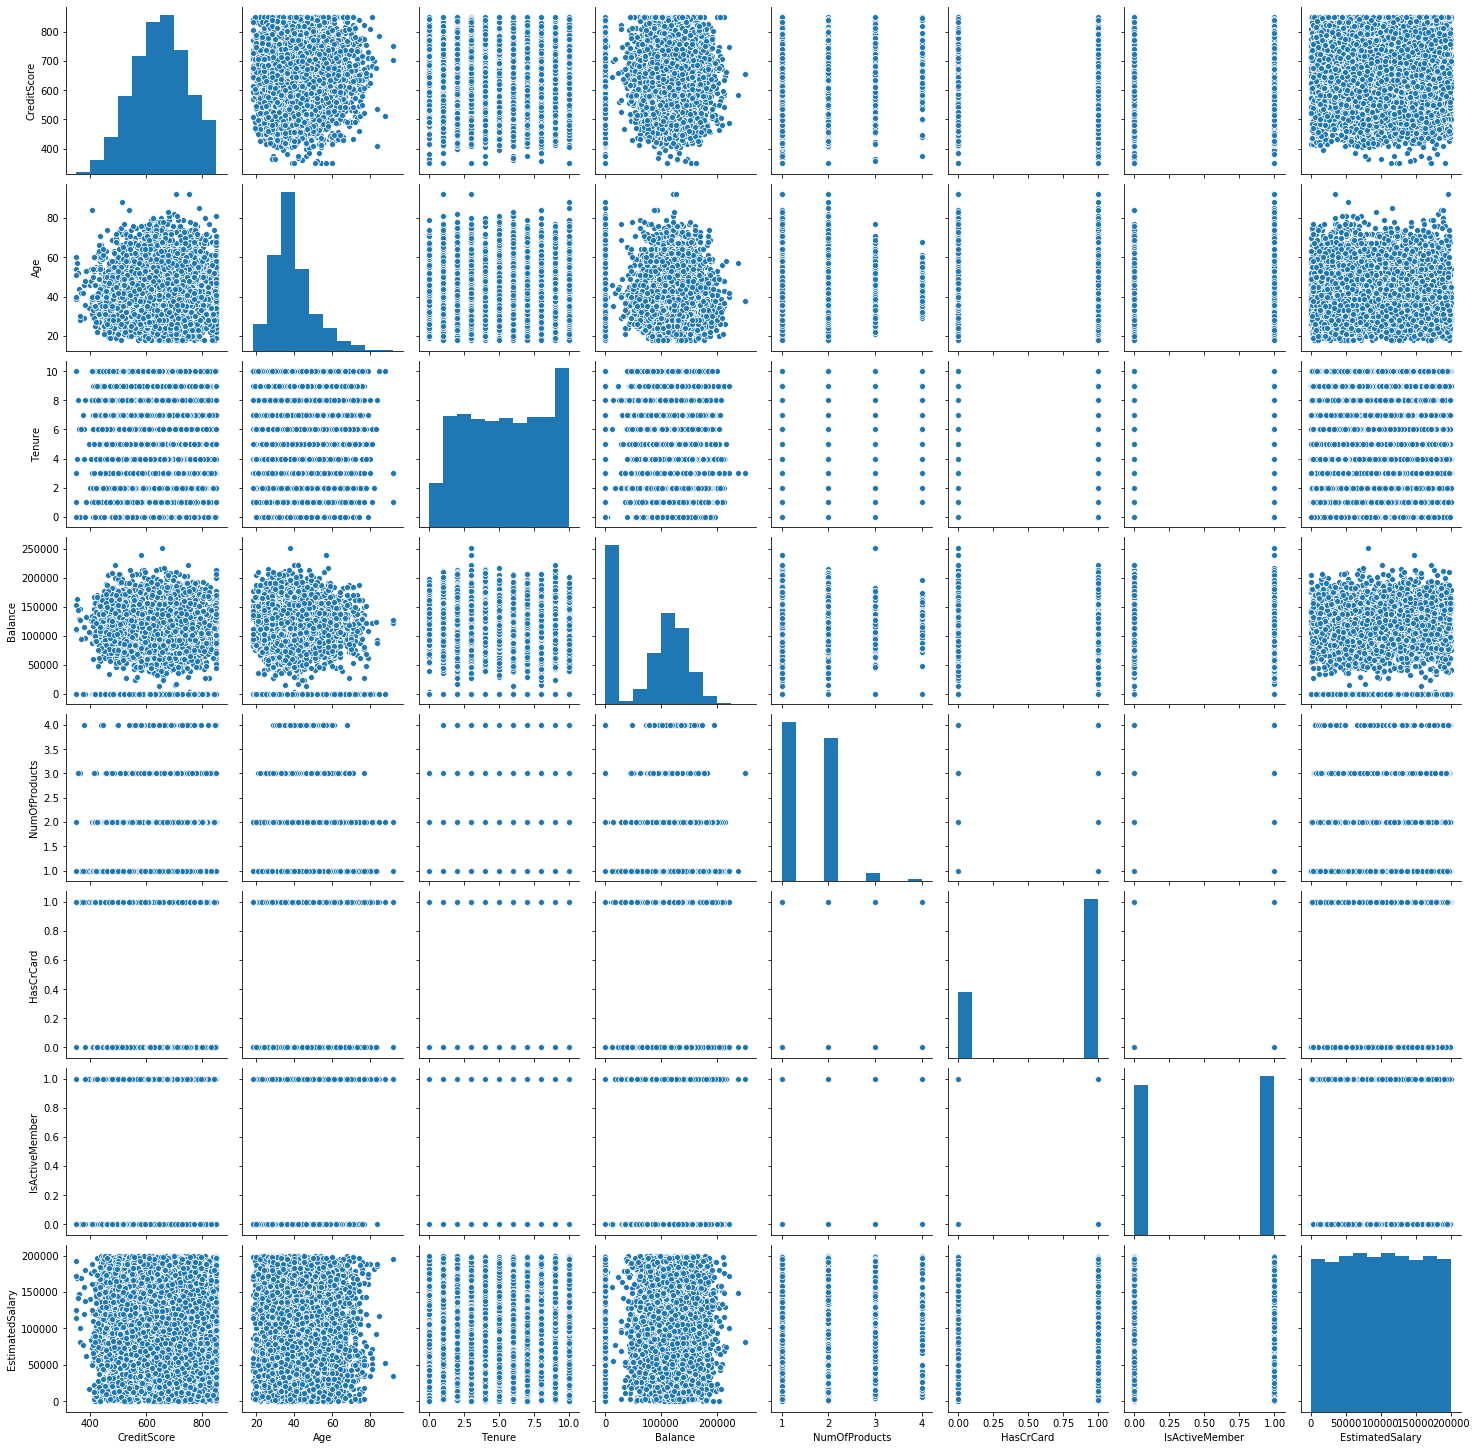

In [7]:
sns.pairplot(df.iloc[:,3:13])

In [0]:
#df['Gender']=df['Gender'].astype('category')
#df['Geography']=df['Geography'].astype('category')

#Drop the columns which are unique for all users like IDs
X = df.iloc[:, 3:13].values
#Exited is the target set
y = df.iloc[:, 13].values 

In [0]:
# Encoding categorical data to numeric data
# because ANN's can only work with numeric

le1 = LabelEncoder()
X[:, 1] = le1.fit_transform(X[:, 1])
le2 = LabelEncoder()
X[:, 2] = le2.fit_transform(X[:, 2])

onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()

#Remove dummie variable
X = X[:, 1:]

In [0]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [0]:
# Normalizing the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Initialising the Neural Network & build the Model
classifier = Sequential()

In [0]:
# Add input layer and first hidden layer
classifier.add(Dense(6, activation = 'relu', input_shape=(X_train.shape[1], )))
classifier.add(Dropout(rate=0.1))

# Add the second hidden layer to achieve a deep neural network
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dropout(rate=0.1))

# Add the Output layer
classifier.add(Dense(1, activation = 'sigmoid'))

#Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

In [30]:
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
7000/7000 [==============================] - 4s 641us/step - loss: 0.6563 - acc: 0.7049
Epoch 2/100
7000/7000 [==============================] - 4s 547us/step - loss: 0.4995 - acc: 0.7850
Epoch 3/100
7000/7000 [==============================] - 4s 560us/step - loss: 0.3339 - acc: 0.8399
Epoch 4/100
7000/7000 [==============================] - 4s 539us/step - loss: 0.2597 - acc: 0.8817
Epoch 5/100
7000/7000 [==============================] - 4s 524us/step - loss: 0.1949 - acc: 0.9164
Epoch 6/100
7000/7000 [==============================] - 4s 540us/step - loss: 0.1431 - acc: 0.9384
Epoch 7/100
7000/7000 [==============================] - 4s 550us/step - loss: 0.1341 - acc: 0.9421
Epoch 8/100
7000/7000 [==============================] - 4s 588us/step - loss: 0.1153 - acc: 0.9511
Epoch 9/100
7000/7000 [==============================] - 4s 548us/step - loss: 0.1116 - acc: 0.9520
Epoch 10/100
7000/7000 [==============================] - 4s 552us/step - loss: 0.1060 - acc: 0.9497

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
# Predicting the results using 0.5 as a threshold
y_pred = (y_pred > 0.5)

In [0]:
# Computing the Confusion Matrix and Accuracy Score
cm = confusion_matrix(y_test, y_pred)
acs=accuracy_score(y_test,y_pred)

In [34]:
print("The Accuracy Score is : ",acs)

The Accuracy Score is :  0.798


In [35]:
print("The Confusion Matrix is : \n",cm)

The Confusion Matrix is : 
 [[2394    1]
 [ 605    0]]
